# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

Reading The DataSet

In [2]:
train_data=pd.read_csv(r"C:\Users\91987\Downloads\ABC_Bank_train_data.csv",index_col=0)
test_data=pd.read_csv(r"C:\Users\91987\Downloads\ABC_Bank_test_data.csv",index_col=0)

In [3]:
print(train_data.shape)
train_data.head()

(800, 20)


,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
serial number,,,,,,,,,,,,,,,,,,,,
1,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
2,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1
3,A14,12,A34,A46,A61,A74,2.0,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,2
4,A11,42,A32,A42,A61,A74,2.0,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,A61,A73,3.0,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [4]:
print(test_data.shape)
test_data.head()

(200, 19)


,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


 finding the missing values 

In [6]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64


checking the data types 

In [7]:
print(train_data.dtypes)


account_info         object
duration_month        int64
credit_history       object
purpose              object
savings_account      object
employment_st        object
poi                 float64
personal_status      object
gurantors            object
resident_since        int64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
Group_no              int64
dtype: object


In [8]:
print(test_data.dtypes)

account_info         object
duration_month        int64
credit_history       object
purpose              object
savings_account      object
employment_st        object
poi                 float64
personal_status      object
gurantors            object
resident_since        int64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
dtype: object


Imputing The Missing Values

In [9]:
colname1=["employment_st","gurantors","housing_type"]

for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

In [10]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                 12
personal_status      0
gurantors            0
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64


In [13]:
# Imputing numerical missing data with mean values 
colname2=["poi","age"]

for x in colname2:
    train_data[x].fillna(round(train_data[x].mean(),0),inplace=True)
    test_data[x].fillna(round(test_data[x].mean(),0),inplace=True)
                             

In [14]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64


Checking the basic info about Dataset such as mean , count, unique values ,median etc using describe function

In [15]:
train_data.describe(include="all")

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
count,800,800.00000,800,800,800,800,800.000000,800,800,800.000000,800,800.000000,800,800,800.000000,800,800.000000,800,800,800.000000
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,310,NaN,424,223,476,275,NaN,437,728,NaN,266,NaN,653,570,NaN,503,NaN,481,773,NaN
mean,NaN,20.65125,NaN,NaN,NaN,NaN,2.951250,NaN,NaN,2.841250,NaN,35.406250,NaN,NaN,1.396250,NaN,1.147500,NaN,NaN,2.076250
std,NaN,12.15635,NaN,NaN,NaN,NaN,1.121582,NaN,NaN,1.106833,NaN,11.470317,NaN,NaN,0.569773,NaN,0.354825,NaN,NaN,0.744062
min,NaN,4.00000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.00000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,2.000000
50%,NaN,18.00000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,2.000000
75%,NaN,24.00000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,41.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,3.000000


In [16]:
test_data.describe(include="all")

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
count,200,200.000000,200,200,200,200,200.000000,200,200,200.000000,200,200.000000,200,200,200.000000,200,200.000000,200,200
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,A14,NaN,A32,A43,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,84,NaN,106,57,127,64,NaN,111,179,NaN,66,NaN,161,143,NaN,127,NaN,115,190
mean,NaN,21.910000,NaN,NaN,NaN,NaN,2.975000,NaN,NaN,2.860000,NaN,36.105000,NaN,NaN,1.450000,NaN,1.185000,NaN,NaN
std,NaN,11.635671,NaN,NaN,NaN,NaN,1.067743,NaN,NaN,1.093792,NaN,10.998126,NaN,NaN,0.607739,NaN,0.389272,NaN,NaN
min,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,20.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,28.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,20.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.500000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,27.250000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,43.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [17]:
train_data.columns

Index(['account_info', 'duration_month', 'credit_history', 'purpose',
       'savings_account', 'employment_st', 'poi', 'personal_status',
       'gurantors', 'resident_since', 'property_type', 'age',
       'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables',
       'telephone', 'foreigner', 'Group_no'],
      dtype='object')

Converting Categorical Data to Numerical Using Label Encoder

In [18]:
# Transforming Categorical Data to Numerical
from sklearn.preprocessing import LabelEncoder
colname=['account_info', 'credit_history', 'purpose', 'savings_account','employment_st', 'personal_status',
        'gurantors','property_type','installment_type','housing_type','job_type','telephone','foreigner']
le=LabelEncoder()
for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [19]:
train_data.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
serial number,,,,,,,,,,,,,,,,,,,,
1,0,6,4,4,4,4,4.0,2,0,4,0,67.0,2,1,2,2,1,1,0,3
2,1,48,2,4,0,2,2.0,1,0,2,0,22.0,2,1,1,2,1,0,0,1
3,3,12,4,7,0,3,2.0,2,0,3,0,49.0,2,1,1,1,2,0,0,2
4,0,42,2,3,0,3,2.0,2,2,4,1,45.0,2,2,1,2,2,0,0,1
5,0,24,3,0,0,2,3.0,2,0,4,3,53.0,2,2,2,2,2,0,0,1


In [20]:
colname=['account_info', 'credit_history', 'purpose', 'savings_account','employment_st', 'personal_status',
        'gurantors','property_type','installment_type','housing_type','job_type','telephone','foreigner']
le=LabelEncoder()
for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [21]:
test_data.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0
2,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0
3,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0
4,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0
5,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0


Checking Correlations between the variables 

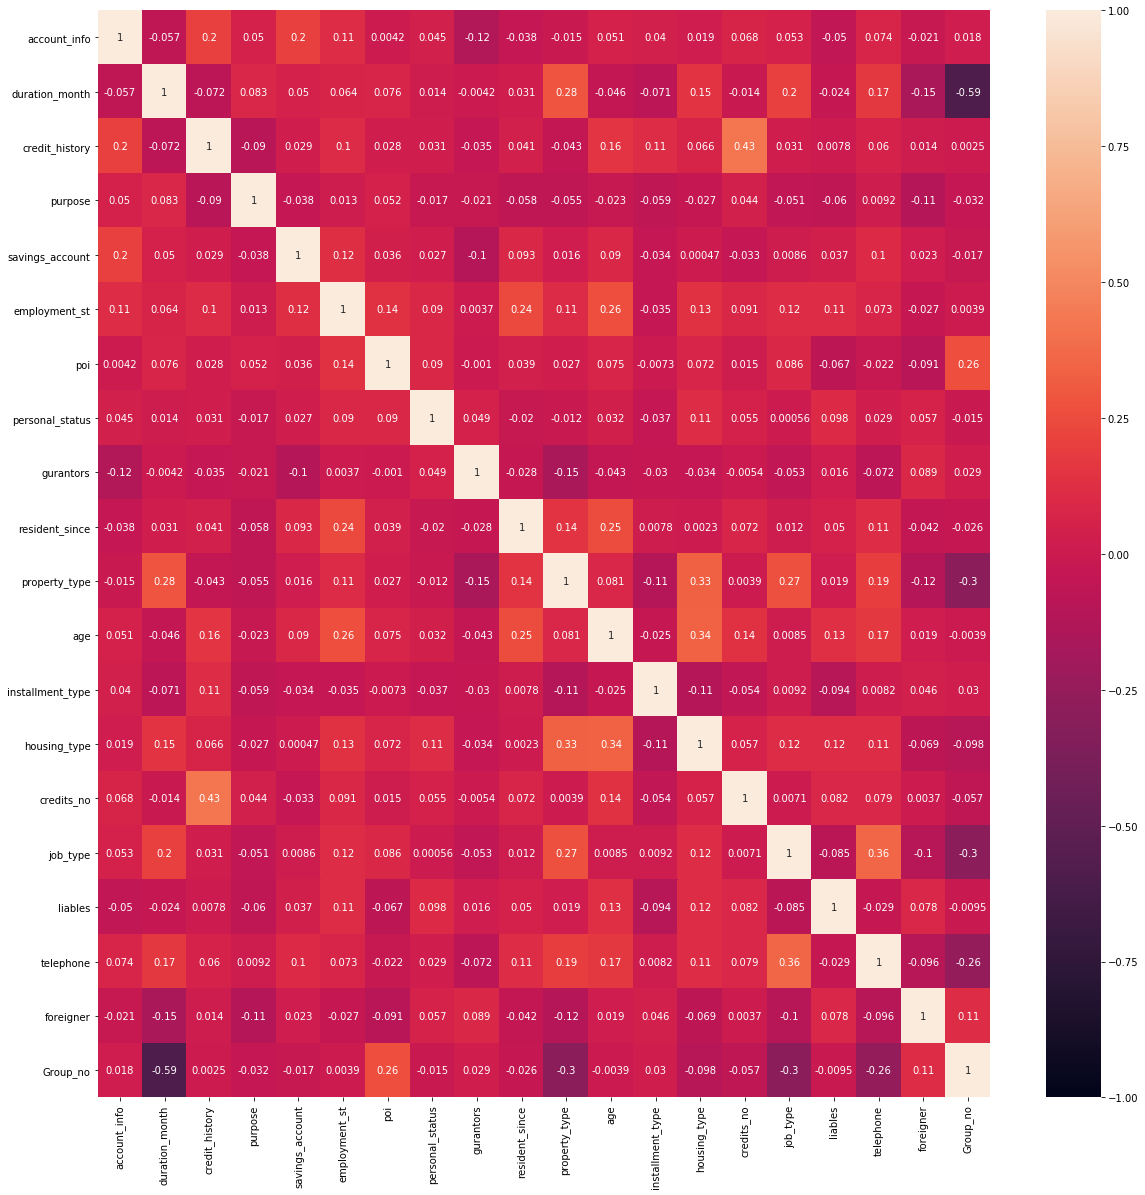

In [22]:
corr_df=train_data.corr()
#print(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

Splitting the Data

In [23]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [24]:
X_train.shape

(800, 19)

In [25]:
Y_train.shape

(800,)

In [26]:
X_test=test_data.values[:,:]

In [27]:
X_test.shape

(200, 19)

# Scaling The Data 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
print(X_train)

[[-1.2749277  -1.20598828  1.33983761 ... -0.41595736  1.22794014
  -0.18689261]
 [-0.46928618  2.25115755 -0.50503346 ... -0.41595736 -0.81437194
  -0.18689261]
 [ 1.14199685 -0.71211031  1.33983761 ...  2.40409256 -0.81437194
  -0.18689261]
 ...
 [ 1.14199685 -0.71211031  1.33983761 ... -0.41595736 -0.81437194
  -0.18689261]
 [ 1.14199685  0.27564565  0.41740208 ... -0.41595736  1.22794014
  -0.18689261]
 [-0.46928618 -0.9590493  -0.50503346 ... -0.41595736 -0.81437194
  -0.18689261]]


 As this is a classification Problem we will use various Classification Algorithms to get the best output

# Building the model 

 Using SVM 

In [30]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[2, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 3, 3, 3, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 1, 3, 3, 2, 3, 1, 1]


# Evaluating  the model

In [31]:
svc_model.score(X_train,Y_train)

0.80875

In [32]:
# this accuracy will be high as it is on training data so quote less accuracy to client

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=svc_model.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[146  45   2]
 [ 15 298  40]
 [  1  50 203]]
              precision    recall  f1-score   support

           1       0.90      0.76      0.82       193
           2       0.76      0.84      0.80       353
           3       0.83      0.80      0.81       254

    accuracy                           0.81       800
   macro avg       0.83      0.80      0.81       800
weighted avg       0.82      0.81      0.81       800



In [34]:
# reports generated on the training data itself since we didn't have the Y_test

# Using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[2 2 1 3 3 1 3 3 1 3 3 3 1 1 1 1 2 2 1 3 3 2 1 3 2 2 1 2 1 1 2 2 1 2 2 3 3
 3 2 2 2 2 3 2 2 2 2 2 3 3 2 1 3 3 1 2 3 3 2 2 2 2 2 2 3 2 2 2 2 3 1 3 2 3
 2 3 2 2 3 1 2 1 2 3 2 3 2 1 1 2 1 3 3 1 3 1 2 3 2 2 2 2 1 2 2 2 2 1 2 3 2
 2 2 2 2 1 2 1 2 2 2 1 3 2 2 3 2 1 2 3 2 3 3 3 3 1 3 3 1 1 2 3 2 3 2 1 2 2
 2 2 2 1 2 1 3 2 2 3 2 2 2 1 2 2 3 2 2 2 1 2 3 2 2 1 2 2 2 2 2 2 2 1 1 1 2
 3 1 2 2 2 2 3 2 1 3 3 2 3 1 1]


# Evaluating the model

In [41]:
classifier.score(X_train,Y_train)

0.69125

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=classifier.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[129  59   5]
 [ 34 255  64]
 [  1  84 169]]
              precision    recall  f1-score   support

           1       0.79      0.67      0.72       193
           2       0.64      0.72      0.68       353
           3       0.71      0.67      0.69       254

    accuracy                           0.69       800
   macro avg       0.71      0.69      0.70       800
weighted avg       0.70      0.69      0.69       800



# Using K Nearest Neigbors

In [45]:
# Predicting using the KNeighbors _Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=10,metric='euclidean')

# euclidean, manhattan,minkowski
# fit the model on the data and predict the values 
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(Y_pred)

[1 2 2 3 3 1 3 3 1 3 3 3 2 2 1 2 2 2 2 3 3 3 2 3 2 2 2 2 1 2 2 2 1 2 2 2 2
 2 3 2 1 2 3 2 1 2 2 3 2 3 3 2 1 1 1 3 3 2 3 3 2 3 2 2 2 2 3 2 2 3 1 3 2 3
 2 3 2 1 1 2 1 1 2 3 2 3 2 1 1 3 1 2 3 2 2 2 2 3 2 1 2 3 1 2 2 2 3 2 2 3 2
 2 2 2 2 3 2 2 2 2 2 1 3 2 3 2 3 1 2 2 3 3 3 2 2 1 3 2 2 2 2 3 2 2 2 1 1 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 1 2 2 2 3 3 2 1 1 2 2 2
 3 1 2 2 2 2 3 3 2 2 3 2 2 2 1]


# Evaluting The Model

In [47]:
model_KNN.score(X_train,Y_train)

0.64

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=model_KNN.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[102  82   9]
 [ 23 278  52]
 [  5 117 132]]
              precision    recall  f1-score   support

           1       0.78      0.53      0.63       193
           2       0.58      0.79      0.67       353
           3       0.68      0.52      0.59       254

    accuracy                           0.64       800
   macro avg       0.68      0.61      0.63       800
weighted avg       0.66      0.64      0.64       800



# Using Decision Tree

In [48]:
# predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion='gini',random_state=10)

# fit the model on the data and predict the values 
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)


[3 2 1 3 1 1 3 3 2 3 2 3 2 2 1 2 2 3 2 3 3 2 2 3 3 3 1 2 2 1 2 2 1 1 3 2 3
 3 2 2 1 2 3 3 2 2 1 3 2 3 3 1 3 2 1 2 3 2 3 2 2 3 2 1 2 3 1 1 1 2 1 2 2 3
 2 3 2 1 1 1 1 1 2 3 2 3 3 1 1 1 1 3 2 2 2 1 2 3 2 2 1 3 1 3 2 3 3 2 3 3 1
 2 2 2 3 2 2 1 2 2 2 1 3 3 2 2 2 1 2 3 3 3 3 3 3 1 3 3 1 1 1 2 2 3 2 2 2 2
 3 2 3 1 3 1 3 3 2 1 2 2 2 3 3 2 3 1 2 1 1 2 2 1 1 1 2 1 2 2 3 2 2 1 2 1 1
 3 1 2 2 1 2 3 2 2 2 3 1 3 1 1]


# Evaluting The Model

In [49]:
model_DecisionTree.score(X_train,Y_train)

1.0

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=model_DecisionTree.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[193   0   0]
 [  0 353   0]
 [  0   0 254]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       254

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



 reports generated on the training data itself since we didn't have the Y_test

 this accuracy will be high as it is on training data so quote less accuracy to client

# We will use Decision Tree as our model for any future actions as it gave us the best accuracy 

In [52]:
test_data=pd.read_csv(r"C:\Users\91987\Downloads\ABC_Bank_test_data.csv",header=0)
test_data['Group_no']=Y_pred
test_data.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,...,A124,54.0,A143,A153,2,A173,2,A191,A201,3
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,...,A121,48.0,A141,A151,2,A172,1,A192,A201,2
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,...,A122,24.0,A143,A152,2,A173,1,A191,A201,1
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,...,A123,35.0,A143,A152,2,A173,1,A191,A201,3
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,...,A121,24.0,A143,A151,1,A171,1,A191,A201,1


In [53]:
test_data.to_excel(r'test_data_output.xlsx',index=False)

In [54]:
test_data.Group_no.value_counts()

2    82
3    63
1    55
Name: Group_no, dtype: int64

# This are the no of Customers Belonging to Each Group 